# Autoencoders training

In [34]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import tensorflow as tf

from utils import *
from autoencoders import *

In [35]:
keras.backend.clear_session()
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [36]:
w_length = 200
w_increment = 100

path = 'D:\Documentos\Datasets\Grabaciones 2 Corr'

raw_data = loadRawData(path, w_length, w_increment)

10_ext_0_31_62.txt
10_flex_0_31_62.txt
10_flex_1333_31_62.txt
10_flex_3638_31_62.txt
10_pron_0_4_62.txt
10_pron_919_4_62.txt
10_stat_0_31_62.txt
10_sup_0_4_62.txt
10_sup_919_4_62.txt
11_ext_0_29_48.txt
11_flex_0_29_48.txt
11_flex_1333_29_48.txt
11_flex_3638_29_48.txt
11_pron_0_3_48.txt
11_pron_919_3_48.txt
11_stat_0_29_48.txt
11_sup_0_3_48.txt
11_sup_919_3_48.txt
12_ext_0_31_66.txt
12_flex_0_31_66.txt
12_flex_1333_31_66.txt
12_flex_3638_31_66.txt
12_pron_0_5_66.txt
12_pron_919_5_66.txt
12_sup_0_5_66.txt
12_sup_919_5_66.txt
13_ext_0_31_70.txt
13_flex_0_31_70.txt
13_flex_1333_31_70.txt
13_flex_3638_31_70.txt
13_pron_0_5_70.txt
13_pron_919_5_70.txt
13_stat_0_5_70.txt
13_sup_0_5_70.txt
13_sup_919_5_70.txt
14_ext_0_29_4.txt
14_flex_0_29_4.txt
14_flex_1333_29_4.txt
14_flex_3638_29_4.txt
14_pron_0_4_48.txt
14_pron_919_4_48.txt
14_stat_0_4_48.txt
14_sup_919_4_48.txt
15_ext_0_29_54.txt
15_flex_0_29_54.txt
15_flex_1333_29_54.txt
15_flex_3638_29_54.txt
15_pron_0_4_54.txt
15_pron_919_4_54.txt
15_s

In [37]:
w, c = raw_data[0].shape
ch = c - 1
print('Number of examples (m) = ', len(raw_data))
print('Window lenght (w) = ', w)
print('Number of EMG channels (ch) = ', ch)

Number of examples (m) =  22600
Window lenght (w) =  200
Number of EMG channels (ch) =  4


In [38]:
emg_raw_arr = np.array(raw_data)[:,:,0:4]
print(emg_raw_arr.shape)

(22600, 200, 4)


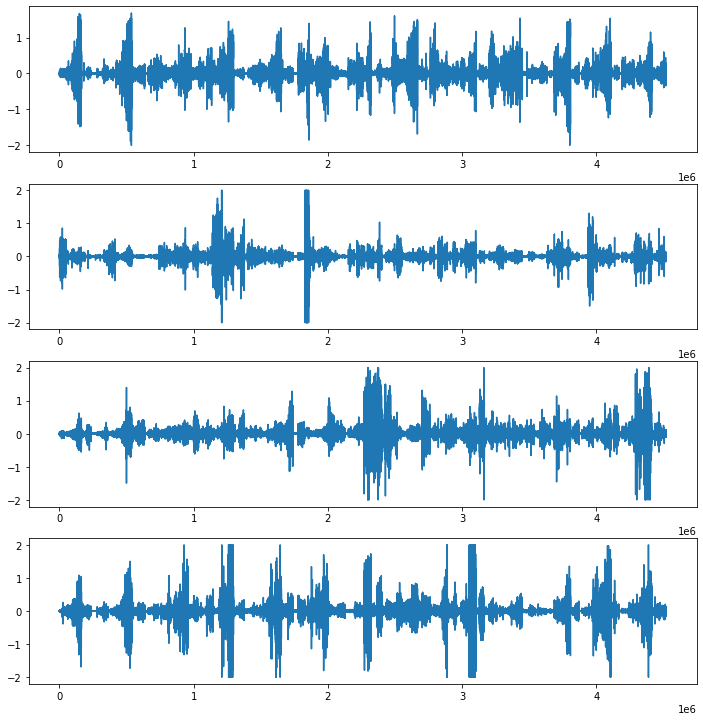

In [39]:
fig, axs = plt.subplots(4, figsize=(10,10))
fig.tight_layout()
plot_data_emg = np.vstack(emg_raw_arr)

n = 100000

axs[0].plot(plot_data_emg[:,0])
axs[1].plot(plot_data_emg[:,1])
axs[2].plot(plot_data_emg[:,2])
axs[3].plot(plot_data_emg[:,3])

In [40]:
maf_emg_data = maf(emg_raw_arr)

ascol = maf_emg_data.reshape(-1, ch)
sc = MinMaxScaler()
trans = sc.fit_transform(ascol)

maf_emg_data = trans.reshape(-1, w, ch)
print(maf_emg_data.shape)

(22600, 200, 4)


In [41]:
X_train, X_test = train_test_split(maf_emg_data, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(20340, 200, 4)
(2260, 200, 4)


In [42]:
X_train_flat = X_train.reshape(X_train.shape[0], w*ch)
X_test_flat = X_test.reshape(X_test.shape[0], w*ch)
print(X_train_flat.shape)
print(X_test_flat.shape)

(20340, 800)
(2260, 800)


In [43]:
autoencoders_names = []
autoencoders_train_mae = []
autoencoders_test_mae = []

# Deep Autoencoder

In [44]:
ann_enc = ann_encoder(64)
ann_dec = ann_decoder(w*ch)
deep_ae = autoencoder(ann_enc, ann_dec, (w*ch,))

In [45]:
deep_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
deep_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 800)]             0         
                                                                 
 Deep_encoder (Sequential)   (None, 64)                114944    
                                                                 
 Deep_decoder (Sequential)   (None, 800)               115680    
                                                                 
Total params: 230,624
Trainable params: 230,624
Non-trainable params: 0
_________________________________________________________________


In [46]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = deep_ae.fit(X_train_flat, X_train_flat, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
80/80 [==============================] - 5s 15ms/step - loss: 0.3372 - mae: 0.1770 - val_loss: 0.1517 - val_mae: 0.0475
Epoch 2/100
80/80 [==============================] - 1s 10ms/step - loss: 0.1144 - mae: 0.0211 - val_loss: 0.1105 - val_mae: 0.0182
Epoch 3/100
80/80 [==============================] - 1s 11ms/step - loss: 0.1083 - mae: 0.0161 - val_loss: 0.1081 - val_mae: 0.0154
Epoch 4/100
80/80 [==============================] - 1s 11ms/step - loss: 0.1069 - mae: 0.0150 - val_loss: 0.1073 - val_mae: 0.0146
Epoch 5/100
80/80 [==============================] - 1s 10ms/step - loss: 0.1058 - mae: 0.0141 - val_loss: 0.1056 - val_mae: 0.0131
Epoch 6/100
80/80 [==============================] - 1s 10ms/step - loss: 0.1045 - mae: 0.0129 - val_loss: 0.1050 - val_mae: 0.0126
Epoch 7/100
80/80 [==============================] - 1s 11ms/step - loss: 0.1041 - mae: 0.0126 - val_loss: 0.1047 - val_mae: 0.0125
Epoch 8/100
80/80 [==============================] - 1s 10ms/step - loss: 0.

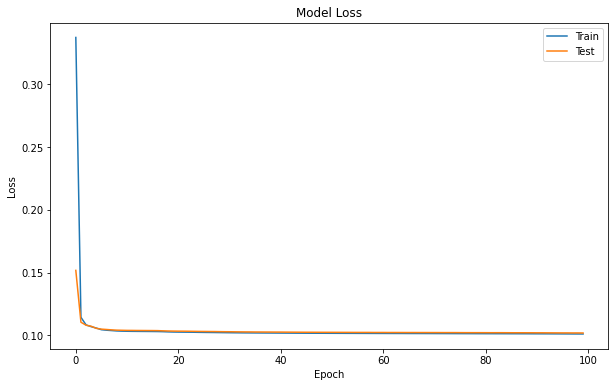

In [47]:
plotLoss(history)

In [48]:
autoencoders_names.append('Deep Autoencoder')
autoencoders_train_mae.append(deep_ae.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(deep_ae.evaluate(X_test_flat, X_test_flat)[1])

71/71 [==============================] - 0s 5ms/step - loss: 0.1019 - mae: 0.0088


1/1 [==============================] - 0s 194ms/step


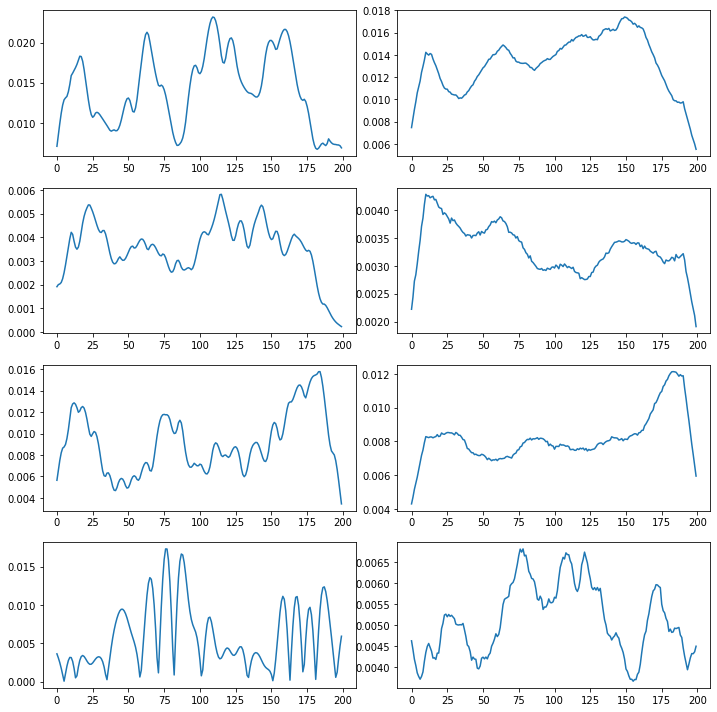

In [49]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = deep_ae.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])


# Convolutional Autoencoder

In [50]:
latent_dim = (2,2)
cnn_enc = cnn_encoder(latent_dim)
cnn_dec = cnn_decoder(latent_dim)
cnn_ae = autoencoder(cnn_enc, cnn_dec, (w,ch,1))

In [51]:
cnn_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
cnn_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 4, 1)]       0         
                                                                 
 Convolutional_encoder (Sequ  (None, 50, 1, 8)         792       
 ential)                                                         
                                                                 
 Convolutional_decoder (Sequ  (None, 200, 4, 1)        2393      
 ential)                                                         
                                                                 
Total params: 3,185
Trainable params: 3,185
Non-trainable params: 0
_________________________________________________________________


In [52]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = cnn_ae.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
80/80 [==============================] - 13s 29ms/step - loss: 0.1145 - mae: 0.0217 - val_loss: 0.1083 - val_mae: 0.0169
Epoch 2/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1058 - mae: 0.0149 - val_loss: 0.1050 - val_mae: 0.0129
Epoch 3/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1032 - mae: 0.0114 - val_loss: 0.1031 - val_mae: 0.0103
Epoch 4/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1023 - mae: 0.0103 - val_loss: 0.1025 - val_mae: 0.0094
Epoch 5/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1016 - mae: 0.0090 - val_loss: 0.1022 - val_mae: 0.0088
Epoch 6/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1018 - mae: 0.0094 - val_loss: 0.1021 - val_mae: 0.0086
Epoch 7/100
80/80 [==============================] - 1s 14ms/step - loss: 0.1012 - mae: 0.0082 - val_loss: 0.1017 - val_mae: 0.0080
Epoch 8/100
80/80 [==============================] - 1s 14ms/step - loss: 0

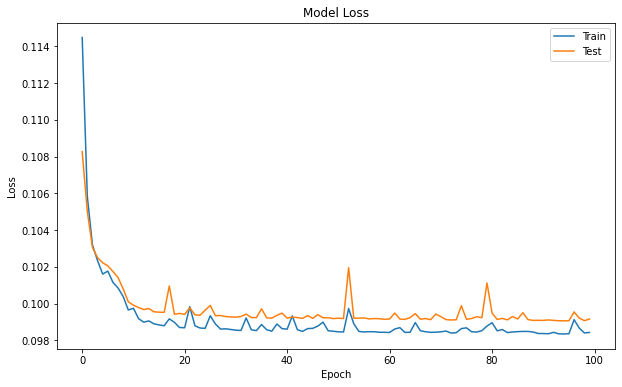

In [53]:
plotLoss(history)

In [54]:
autoencoders_names.append('CNN Autoencoder')
autoencoders_train_mae.append(cnn_ae.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(cnn_ae.evaluate(X_test, X_test)[1])

71/71 [==============================] - 0s 5ms/step - loss: 0.0992 - mae: 0.0022


1/1 [==============================] - 0s 240ms/step


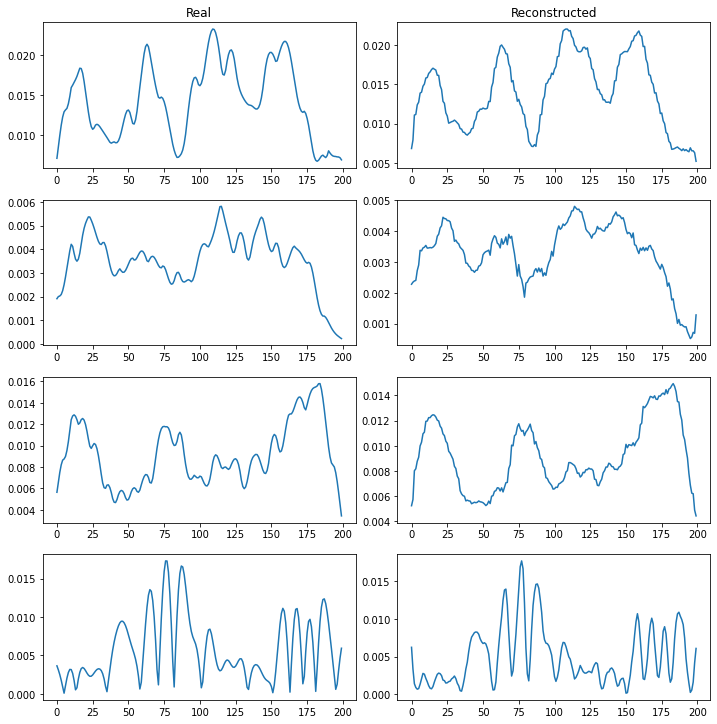

In [55]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].set_title("Real")
axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = cnn_ae.predict(X_test[sample,:,:].reshape(1, w, ch, 1))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].set_title("Reconstructed")
axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Sequence to Sequence Autoencoder

In [56]:
lstm_enc = lstm_encoder(64)
lstm_dec = lstm_decoder(w, ch)
lstm_ae = autoencoder(lstm_enc, lstm_dec, (w,ch))

In [57]:
lstm_ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
lstm_ae.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 4)]          0         
                                                                 
 sts_encoder (Sequential)    (None, 64)                14848     
                                                                 
 sts_decoder (Sequential)    (None, 200, 4)            1104      
                                                                 
Total params: 15,952
Trainable params: 15,952
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = lstm_ae.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/100
80/80 [==============================] - 12s 78ms/step - loss: 0.1705 - mae: 0.0276 - val_loss: 0.1434 - val_mae: 0.0206
Epoch 2/100
80/80 [==============================] - 5s 65ms/step - loss: 0.1114 - mae: 0.0187 - val_loss: 0.1085 - val_mae: 0.0164
Epoch 3/100
80/80 [==============================] - 5s 67ms/step - loss: 0.1070 - mae: 0.0155 - val_loss: 0.1069 - val_mae: 0.0153
Epoch 4/100
80/80 [==============================] - 6s 70ms/step - loss: 0.1060 - mae: 0.0148 - val_loss: 0.1062 - val_mae: 0.0143
Epoch 5/100
80/80 [==============================] - 6s 75ms/step - loss: 0.1053 - mae: 0.0142 - val_loss: 0.1057 - val_mae: 0.0137
Epoch 6/100
80/80 [==============================] - 6s 74ms/step - loss: 0.1060 - mae: 0.0149 - val_loss: 0.1085 - val_mae: 0.0166
Epoch 7/100
80/80 [==============================] - 6s 73ms/step - loss: 0.1081 - mae: 0.0169 - val_loss: 0.1073 - val_mae: 0.0151
Epoch 8/100
80/80 [==============================] - 6s 74ms/step - loss: 0

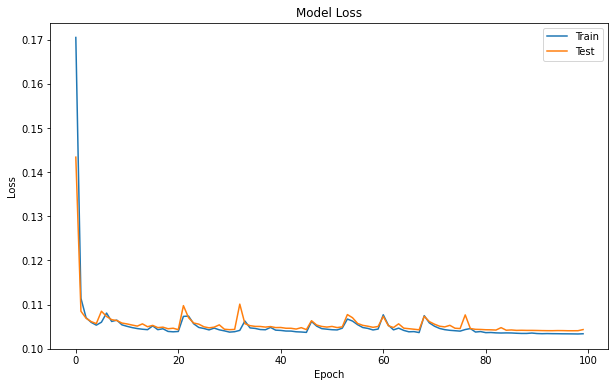

In [59]:
plotLoss(history)

In [60]:
autoencoders_names.append('LSTM Autoencoder')
autoencoders_train_mae.append(lstm_ae.evaluate(X_train, X_train)[1])
autoencoders_test_mae.append(lstm_ae.evaluate(X_test, X_test)[1])

71/71 [==============================] - 1s 14ms/step - loss: 0.1043 - mae: 0.0122


1/1 [==============================] - 1s 793ms/step


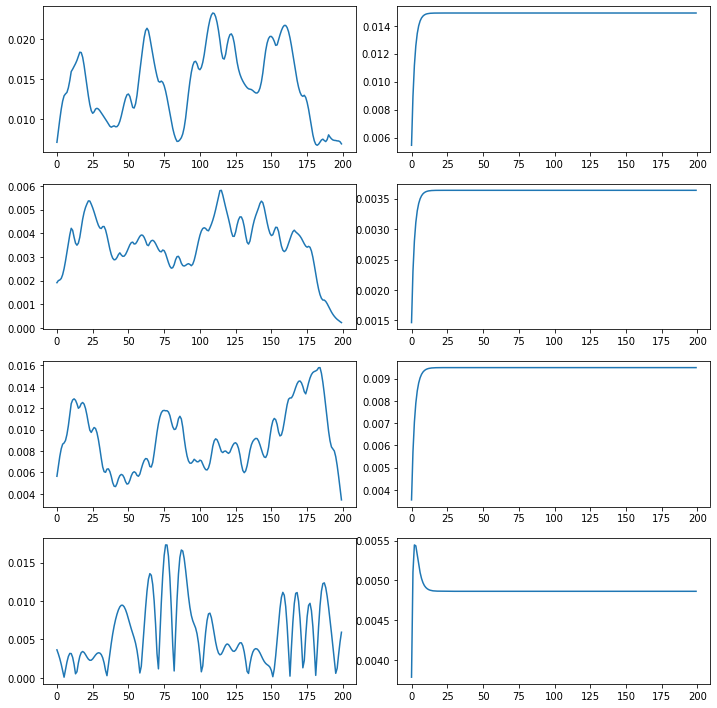

In [61]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = lstm_ae.predict(X_test[sample,:,:].reshape(1, w, ch))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Variational Autoencoder

In [62]:
vae_ae, vae_enc, vae_dec = vae_autoencoder((w*ch,), w*ch, 128, 64)

In [63]:
vae_ae.compile(optimizer='adam', metrics=['mae'])
vae_ae.summary()

Model: "vae_autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 vae_encoder (Functional)       [(None, 64),         119040      ['input_4[0][0]']                
                                 (None, 64),                                                      
                                 (None, 64)]                                                      
                                                                                                  
 vae_decoder (Functional)       (None, 800)          111520      ['vae_encoder[0][2]']            
                                                                                    

In [64]:
history = vae_ae.fit(X_train_flat, X_train_flat, epochs=100, batch_size=128, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/100
159/159 [==============================] - 1s 6ms/step - loss: 165.5833 - mae: 0.0847 - val_loss: 89.5995 - val_mae: 0.0198
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 88.2305 - mae: 0.0178 - val_loss: 87.6261 - val_mae: 0.0162
Epoch 3/100
159/159 [==============================] - 1s 4ms/step - loss: 86.8067 - mae: 0.0163 - val_loss: 86.8374 - val_mae: 0.0158
Epoch 4/100
159/159 [==============================] - 1s 4ms/step - loss: 85.7737 - mae: 0.0151 - val_loss: 85.9013 - val_mae: 0.0156
Epoch 5/100
159/159 [==============================] - 1s 4ms/step - loss: 85.0444 - mae: 0.0143 - val_loss: 85.3103 - val_mae: 0.0141
Epoch 6/100
159/159 [==============================] - 1s 4ms/step - loss: 84.6510 - mae: 0.0139 - val_loss: 85.0312 - val_mae: 0.0139
Epoch 7/100
159/159 [==============================] - 1s 4ms/step - loss: 84.3689 - mae: 0.0136 - val_loss: 84.7474 - val_mae: 0.0138
Epoch 8/100
159/159 [==============================] -

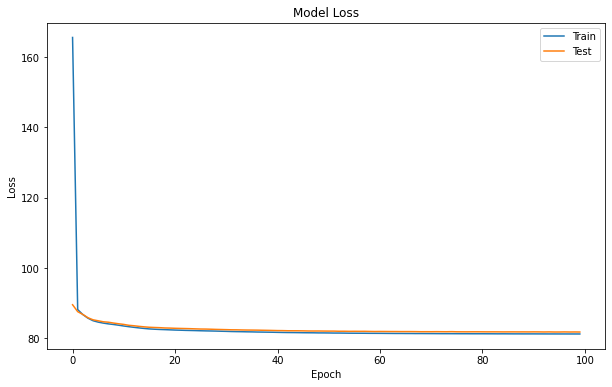

In [65]:
plotLoss(history)

In [66]:
autoencoders_names.append('VAE Autoencoder')
autoencoders_train_mae.append(vae_ae.evaluate(X_train_flat, X_train_flat)[1])
autoencoders_test_mae.append(vae_ae.evaluate(X_test_flat, X_test_flat)[1])

71/71 [==============================] - 0s 2ms/step - loss: 81.8550 - mae: 0.0085


1/1 [==============================] - 0s 66ms/step


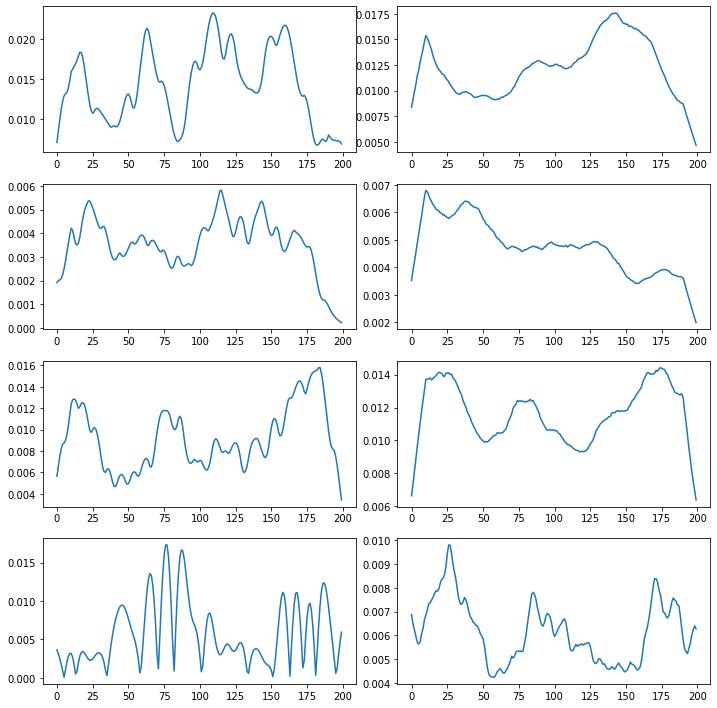

In [67]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
fig.tight_layout()

sample = 0

real_data = X_test_flat.reshape(X_test_flat.shape[0], w, ch)[sample,:,:]

axs[0,0].plot(real_data[:,0])
axs[1,0].plot(real_data[:,1])
axs[2,0].plot(real_data[:,2])
axs[3,0].plot(real_data[:,3])

deco_data = vae_ae.predict(X_test_flat[sample,:].reshape(1, X_test_flat.shape[1]))
deco_data = deco_data.reshape(1, w, ch)[0,:,:]

axs[0,1].plot(deco_data[:,0])
axs[1,1].plot(deco_data[:,1])
axs[2,1].plot(deco_data[:,2])
axs[3,1].plot(deco_data[:,3])

# Autoencoders Comparison

In [68]:
autoencoders_comparison = pd.DataFrame(zip(autoencoders_names, autoencoders_train_mae, autoencoders_test_mae), columns=['Model', 'Train MAE', 'Test MAE'])

autoencoders_comparison = autoencoders_comparison.sort_values('Test MAE', ascending=True)
autoencoders_comparison

,Model,Train MAE,Test MAE
1,CNN Autoencoder,0.002211,0.002221
3,VAE Autoencoder,0.008293,0.008460
0,Deep Autoencoder,0.008617,0.008781
2,LSTM Autoencoder,0.012062,0.012171


# Selected Model Training

In [72]:
cnn_encoder_final = cnn_encoder((2,2))
cnn_decoder_final = cnn_decoder((2,2))
cnn_autoencoder_final = autoencoder(cnn_encoder_final, cnn_decoder_final, (w,ch,1))
cnn_autoencoder_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
history = cnn_autoencoder_final.fit(maf_emg_data, maf_emg_data, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1147 - mae: 0.0223
Epoch 2/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1074 - mae: 0.0169
Epoch 3/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1061 - mae: 0.0157
Epoch 4/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1041 - mae: 0.0133
Epoch 5/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1023 - mae: 0.0105
Epoch 6/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1017 - mae: 0.0095
Epoch 7/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1007 - mae: 0.0077
Epoch 8/100
89/89 [==============================] - 1s 8ms/step - loss: 0.1000 - mae: 0.0062
Epoch 9/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0995 - mae: 0.0053
Epoch 10/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0993 - mae: 0.0048
Epoch 11/100
89/89 [==============================] - 1s 8m

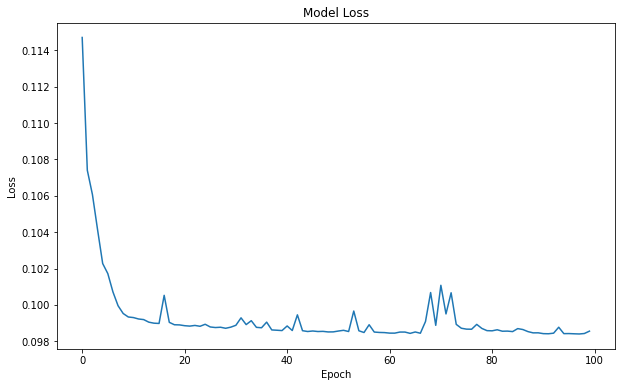

In [73]:
plt.figure(figsize=(10,6))
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [74]:
cnn_encoder_final.save('encoder_model.h5')